# 对于二分类准确度的问题
对于极度偏斜的数据，只使用分类准确度远远不够的

## 混淆矩阵Confusion Matrix
![](https://upload-images.jianshu.io/upload_images/12208146-cb61b1ac0e9a6e09.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 0 - Negative
### 1 - Positive

### 精准率和召回率
#### 精准率$precision = \frac{TP}{TP+FP}$

精准率关注于我们预测的Positive的正确率

#### 召回率$recall = \frac{TP}{TP+FN}$
召回率关注于我们对于真实的Positive，能够找到多少

example：
![](https://upload-images.jianshu.io/upload_images/12208146-6ada646e20dcfa26.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

我们应该关注于比较偏斜的部分
![](https://upload-images.jianshu.io/upload_images/12208146-deae349912448d18.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 实现混淆矩阵，精准率，召回率

In [1]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

In [3]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_log_predict = log_reg.predict(X_test)
log_reg.score(X_test,y_test)

0.9755555555555555

####  混淆矩阵，精准率，召回率

In [4]:
def TN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
def FP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
def FN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
def TP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
TN(y_test,y_log_predict),FP(y_test,y_log_predict),FN(y_test,y_log_predict),TP(y_test,y_log_predict)

(403, 2, 9, 36)

In [5]:
def ConfusionMatrix(y_true,y_predict):#混淆矩阵
    return np.array([
        [TN(y_true,y_predict),FP(y_true,y_predict)],
        [FN(y_true,y_predict),TP(y_true,y_predict)]
    ])

ConfusionMatrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]])

In [6]:
def precision(y_true,y_predict):
    tp = TP(y_test,y_predict)
    fp = FP(y_test,y_predict)
    try:
        return tp/(tp+fp)
    except:
        return 0.00
precision(y_test,y_log_predict)

0.9473684210526315

In [7]:
def recall(y_true,y_predict):
    tp = TP(y_test,y_predict)
    fn = FN(y_test,y_predict)
    try:
        return tp/(tp+fn)
    except:
        return 0.00
recall(y_test,y_log_predict)

0.8

#### sklearn中的混淆矩阵，精准率，召回率

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [9]:
from sklearn.metrics import precision_score
precision_score(y_test,y_log_predict)

0.9473684210526315

In [10]:
from sklearn.metrics import recall_score
recall_score(y_test,y_log_predict)

0.8

## 同时关注精准率和召回率：F1 Score
## F1  Score$= \frac{2·precision·recall}{precision+recall}$
### $\frac{1}{F1} = \frac{1}{2}(\frac{1}{precision}+\frac{1}{recall})$

 ### F1 Score是precision和recall的调和平均值

In [11]:
#F1 Score
def F_one(precision,recall):
    try:
        return 2*precision*recall/(precision+recall)
    except:
        return 0.0
    

F_one(0.01,100)

0.01999800019998

In [12]:
# sklearn中的F1 Score
from sklearn.metrics import f1_score
f1_score(y_test,y_log_predict)

0.8674698795180723

### 更改决策边界 {threshold}

In [13]:
score = log_reg.decision_function(X_test)#取出决策得分

In [14]:
y_predict1 = np.array(score >=-5 ,dtype='int')#更改threshold

precision(y_test,y_predict1),recall(y_test,y_predict1)

(0.7272727272727273, 0.8888888888888888)

#### Precision-Recall曲线

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

decision_scores = log_reg.decision_function(X_test)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

#### thresholds,precisions    &   thresholds,recalls

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)
plt.show()

#### Precision-Recall曲线

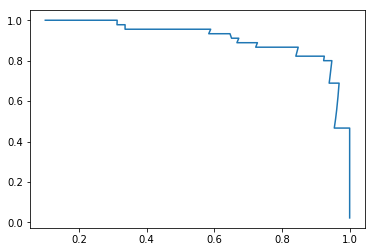

In [17]:
plt.plot(precisions,recalls)
plt.show()

#### sklearn中的precision-recall曲线

In [18]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)
precisions.shape,recalls.shape,thresholds.shape

((145,), (145,), (144,))

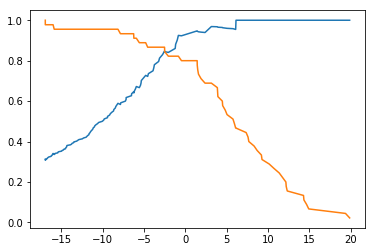

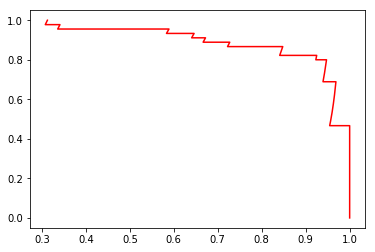

In [19]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.show()
plt.plot(precisions,recalls,color='r')
plt.show()

#### 总结：
    precision-recall曲线类似于/14圆，可以用他的面积大小来比较模型的好坏，模型越大越好

## ROC 曲线

![](https://upload-images.jianshu.io/upload_images/12208146-cb61b1ac0e9a6e09.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### FPR
$FPR = \frac{FP}{TN+FP}$


### TPR
$TPR = \frac{TP}{TP+FN} = Recall$


随着threshold的变化，FPR和TPR的变化趋势一致


##封装自己的混淆矩阵，TN,FP,FN,TP等
```python

def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

def precision_score(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
def recall_score(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
def f1_score(y_true, y_predict):
    precision = precision_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)

    try:
        return 2. * precision * recall / (precision + recall)
    except:
        return 0.

def TPR(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.
def FPR(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tn = TN(y_true, y_predict)
    try:
        return fp / (fp + tn)
    except:
        return 0.
```    

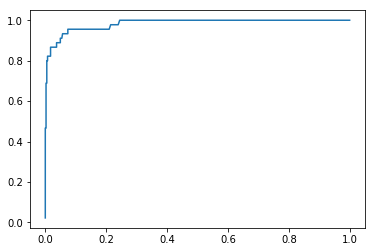

In [20]:
from ML.metrics import FPR,TPR
fprs = []
tprs= []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

plt.plot(fprs,tprs)
plt.show()

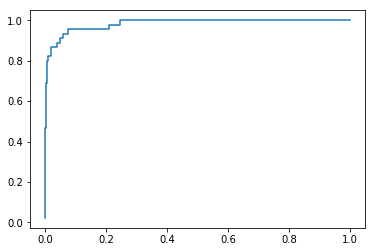

In [21]:
#sklearn中的ROC
from sklearn.metrics import roc_curve
fprs,tprs,thresholds = roc_curve(y_test,decision_scores)

plt.plot(fprs,tprs)
plt.show()

## 求曲线下的面积{sklearn}

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,decision_scores)

0.9830452674897119

### 总结：roc_auc用来比较分类模型的好坏性

# 多分类下的评价标准

## 多分类下的混淆矩阵

In [23]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X = digits.data
#y = digits.target
y = digits.target.copy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=666)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)#OvR
log_reg.score(X_test,y_test)#分类准确度

0.93115438108484

In [24]:
y_predict = log_reg.predict(X_test)
##看文档
precision_score(y_test,y_predict,average='micro')

0.93115438108484

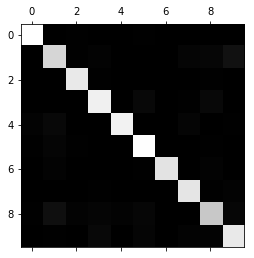

In [25]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_predict)
plt.matshow(cfm,cmap=plt.cm.gray)
plt.show()

###  err_matrix

In [26]:
row_sums = np.sum(cfm,axis = 1)##对混淆矩阵每一行的求和
err_matrix = cfm / row_sums#每行的数字占这行和的百分比
np.fill_diagonal(err_matrix,0)#填充对角线

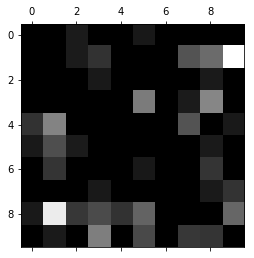

In [27]:
plt.matshow(err_matrix,cmap=plt.cm.gray)
plt.show()#越亮，犯错越多
#由于我们是使用OvO或者OvR,我们可以根据这个图，去调整我们对于{1，8}{1，9}两个二分类的参数，threshlod

### 总结，在实际的工作中，数据的处理，特征工程，可能比算法更重要